In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from scipy.spatial import procrustes
from scipy.spatial.distance import jensenshannon


plt.style.use('ggplot')

data=pd.read_csv('combined_data_with_loc.csv')
#load feature category mapping
feature_category_dict=json.load(open('feature_category_dict.json'))
data.head()

,Community Name,Region,Map reference,Grid reference,Location,Population Density,Travel time to GPO (minutes),Distance to GPO (km),LGA,Primary Care Partnership,...,Travel time to nearest public hospital with emergency department,Distance to nearest public hospital with emergency department,Presentations to emergency departments due to injury,"Presentations to emergency departments due to injury, %",Category 4 & 5 emergency department presentations,"Category 4 & 5 emergency department presentations, %",geo_lat,geo_lon,cart_x,cart_y
0,Ascot Vale,Northern and Western Metropolitan,4,B3,6km NW of Melbourne,3758.623596,9.360142,6.958742,Moonee Valley (C),Inner North West Primary Care Partnership,...,6.630953,4.993841,679.257076,20.502456,1864.918123,56.290032,-37.775606,144.914871,-4.242641,4.242641e+00
1,Braybrook,Northern and Western Metropolitan,4,A3,10km WNW of Melbourne,2025.468296,15.131666,11.595888,Maribyrnong (C),"HealthWest (b): Hobson's Bay, Maribyrnong, Wyn...",...,12.824977,10.161988,543.631989,20.647263,1683.966712,63.957428,-37.779315,144.858155,-9.238795,3.826834e+00
2,Craigieburn,Northern and Western Metropolitan,2,A3,27km N of Melbourne,1034.970870,31.994666,43.100287,Hume (C),Hume-Whittlesea Primary Care Partnership,...,11.570855,15.213189,2044.424399,20.618005,5102.134434,51.454988,-37.570576,144.963028,0.000000,2.700000e+01
3,Croydon,Eastern Metropolitan,2,B4,28km E of Melbourne,1730.064830,28.992647,34.071323,Maroondah (C),Outer East Primary Care Partnership,...,5.093285,3.601752,1754.954941,28.537825,3062.182462,49.795026,-37.813411,145.281013,28.000000,1.714506e-15
4,Fawkner,Northern and Western Metropolitan,4,C1,12km N of Melbourne,2619.120089,17.405267,13.047142,Moreland (C),Inner North West Primary Care Partnership,...,11.510757,12.004044,680.401318,17.909865,1942.874353,51.141315,-37.705724,144.963028,0.000000,1.200000e+01


In [28]:
# Define the feature for population change from 2007 to 2012
feat = 'Socio-demographic'

# Extract the relevant population data based on the feature
socio_data = data[feature_category_dict[feat]]

rows_with_nan = socio_data.isnull().any(axis=1)

print('Number of rows with NaN values:', rows_with_nan.sum())

# print the rows with NaN values
print('Community Names with NaN values:')
print(data['Community Name'][rows_with_nan])

# print % of columns with NaN values for these rows
print('Percentage of columns with NaN values for these rows:')

for i in range(0, len(rows_with_nan)):
	if rows_with_nan[i]:
		print(socio_data.iloc[i].isnull().mean()*100)


# print which columns have NaN values
print('Columns with NaN values:')
print(socio_data.columns[socio_data.isnull().any()])

socio_data


Number of rows with NaN values: 6
Community Names with NaN values:
9     Melbourne Airport
22             Sorrento
26     St Andrews Beach
30               Toorak
31                Tyabb
32            Waterways
Name: Community Name, dtype: object
Percentage of columns with NaN values for these rows:
10.714285714285714
3.571428571428571
5.357142857142857
1.7857142857142856
1.7857142857142856
5.357142857142857
Columns with NaN values:
Index(['% dwellings which are public housing',
       'Dwellings with no motor vehicle, %',
       'Female-headed lone parent families, %',
       'Male-headed lone parent families, %', 'Unemployed, %',
       'Requires assistance with core activities, %',
       'Aged 75+ and lives alone, %'],
      dtype='object')


,Number of Households,Average persons per household,Occupied private dwellings,"Occupied private dwellings, %",Population in non-private dwellings,Public Housing Dwellings,% dwellings which are public housing,Dwellings with no motor vehicle,"Dwellings with no motor vehicle, %",Dwellings with no internet,...,2nd top industry - persons,"2nd top industry, %",3rd top industry - persons,"3rd top industry, %",Top occupation,"Top occupation, %",2nd top occupation - persons,"2nd top occupation, %",3rd top occupation - persons,"3rd top occupation, %"
0,5546,2.433105,5634,92.269898,72,1467,24.025549,825,13.511300,1062,...,Health Care and Social Assistance,12.028964,Education and Training,10.359096,Professionals,33.146233,Clerical and Administrative Workers,16.484490,Managers,15.051699
1,2994,2.734469,2908,93.806452,<5,1310,42.258065,507,16.354839,820,...,Retail Trade,11.814024,Health Care and Social Assistance,10.213415,Labourers,18.181818,Professionals,16.190834,Clerical and Administrative Workers,13.410969
2,11051,2.964257,10328,93.508375,5,384,3.476686,367,3.322770,1374,...,Retail Trade,10.746229,Health Care and Social Assistance,10.305700,Clerical and Administrative Workers,17.676869,Technicians and Trades Workers,17.450157,Machinery Operators and Drivers,12.475828
3,10020,2.350699,9694,92.996930,439,461,4.422487,716,6.868764,1941,...,Manufacturing,13.063750,Construction,11.153950,Professionals,20.873136,Technicians and Trades Workers,16.828855,Clerical and Administrative Workers,16.802071
4,4552,2.769112,4403,92.325435,262,151,3.166282,534,11.197316,1497,...,Retail Trade,11.680078,Health Care and Social Assistance,8.997805,Professionals,16.739659,Technicians and Trades Workers,15.936740,Clerical and Administrative Workers,14.136253
5,5288,2.495461,5606,91.992123,645,719,11.798490,1277,20.955038,1048,...,Health Care and Social Assistance,10.000000,Retail Trade,9.865093,Professionals,27.742153,Clerical and Administrative Workers,14.461694,Labourers,12.149848
6,7566,2.598731,7414,92.397807,506,864,10.767697,995,12.400299,2103,...,Health Care and Social Assistance,11.592026,Construction,9.448389,Professionals,17.233869,Technicians and Trades Workers,16.866322,Clerical and Administrative Workers,15.613940
7,7666,2.620271,7569,92.024316,238,79,0.960486,795,9.665653,997,...,Health Care and Social Assistance,12.681827,Retail Trade,10.335997,Professionals,36.397324,Managers,18.188369,Clerical and Administrative Workers,14.472465
8,3739,2.542926,3733,91.562423,337,21,0.515085,306,7.505519,423,...,Health Care and Social Assistance,14.790381,Retail Trade,9.853160,Professionals,40.867139,Managers,19.896974,Clerical and Administrative Workers,13.243185
9,19,7.368421,32,100.000000,246,<5,NaN,6,18.750000,6,...,Accommodation and Food Services,17.543860,Manufacturing,15.789474,Managers,25.454545,Technicians and Trades Workers,18.181818,Community and Personal Service Workers,12.727273


Moran's I for 'Equivalent household income <$600/week, %': 0.3144
P-value: 0.0005
Significant clusters
       Community Name  LISA Cluster
2         Craigieburn           1.0
4             Fawkner           1.0
6             Glenroy           1.0
7        Malvern East           3.0
8             Malvern           3.0
9   Melbourne Airport           1.0
13        Murrumbeena           3.0
18  Pascoe Vale South           1.0
20            Prahran           3.0
23    South Melbourne           3.0
24        South Yarra           3.0
27      St Kilda East           3.0
28           St Kilda           3.0
29      St Kilda West           3.0
30             Toorak           3.0
33            Windsor           3.0


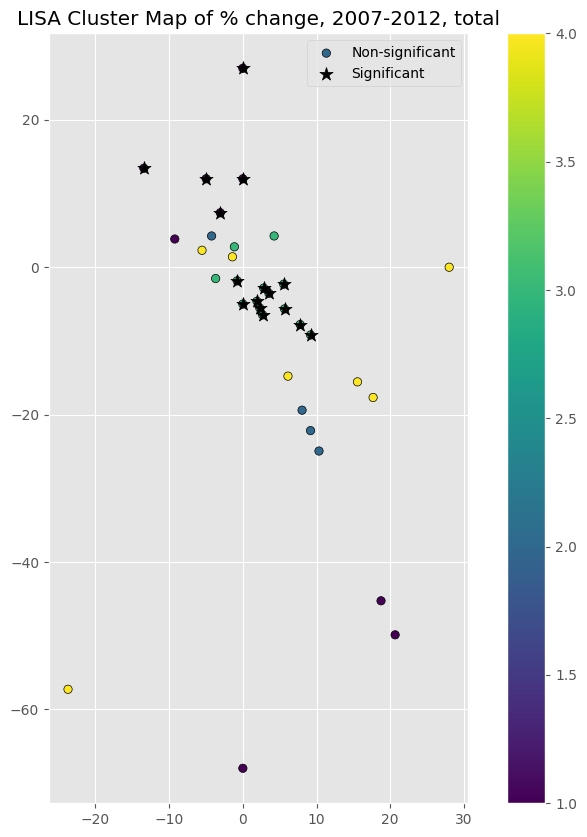

In [29]:
# do a LISA analysis to see if there are any spatial patterns
import numpy as np
import pandas as pd
import geopandas as gpd
from pysal.lib import weights
from esda import Moran, Moran_Local
import matplotlib.pyplot as plt

np.random.seed(42)

# Data is assumed to be loaded with columns 'cart_x' and 'cart_y'
# GeoDataFrame creation with geometry based on coordinates
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['cart_x'], data['cart_y']))

# Create KNN weights with k=8 and row-standardize
w = weights.KNN.from_dataframe(gdf, k=8)
w.transform = 'R'  # Row-standardization

# Calculate global Moran's I
moran = Moran(socio_data['Equivalent household income <$600/week, %'], w, permutations=9999)
print(f"Moran's I for 'Equivalent household income <$600/week, %': {moran.I:.4f}")
print(f"P-value: {moran.p_sim:.4f}")

# Calculate Local Moran's I (LISA)
lisa = Moran_Local(socio_data['Equivalent household income <$600/week, %'], w)

# Plot LISA clusters
fig, ax = plt.subplots(figsize=(10, 10))
# gdf.plot(ax=ax, facecolor='lightgray', edgecolor='black')

# Identify significant clusters and plot them
significant = lisa.p_sim < 0.05
gdf.loc[significant, 'LISA Cluster'] = lisa.q[significant]  # Add cluster information to GeoDataFrame

# print the significant clusters
print('Significant clusters')
print(gdf.loc[significant, ['Community Name', 'LISA Cluster']])


# Plot significant clusters with colors for different cluster types
gdf.assign(cluster=lisa.q).plot(column='cluster', ax=ax, legend=True, cmap='viridis', edgecolor='black')
# highlight the significant suburbs
gdf.loc[significant].plot(ax=ax, marker='*', color='black', markersize=100)
plt.title("LISA Cluster Map of % change, 2007-2012, total")
plt.legend(['Non-significant', 'Significant'])
plt.show()




In [30]:
# check the moran's I for all other features (individually)

# Create a dictionary to store the Moran's I values for each feature
moran_dict = {}
moran_p_dict = {}

feats=socio_data.columns

# keep only the features that are numeric and have no NaN values
feats = socio_data.columns[socio_data.dtypes == 'float64']
feats = feats[~socio_data[feats].isnull().any()]


# Iterate through each feature
for feat in feats:
	moran = Moran(socio_data[feat], w, permutations=9999)
	moran_dict[feat] = moran.I
	moran_p_dict[feat] = moran.p_sim

# Create a DataFrame from the dictionary
moran_df = pd.DataFrame.from_dict(moran_dict, orient='index', columns=['Moran I'])
moran_df['P-value'] = moran_df.index.map(moran_p_dict)

# Sort the DataFrame by Moran's I values
moran_df = moran_df.sort_values(by='Moran I', ascending=False)

moran_df

,Moran I,P-value
"Top occupation, %",0.509570,0.0001
"Did not complete year 12, %",0.477150,0.0001
"Holds degree or higher, %",0.465926,0.0001
"Personal income <$400/week, %",0.377140,0.0001
"Equivalent household income <$600/week, %",0.314443,0.0003
"Unpaid carer of children, %",0.268113,0.0014
"3rd top occupation, %",0.262366,0.0010
IRSD (max),0.209562,0.0038
% residing near PT,0.191828,0.0044
"Dwellings with no internet, %",0.184146,0.0064


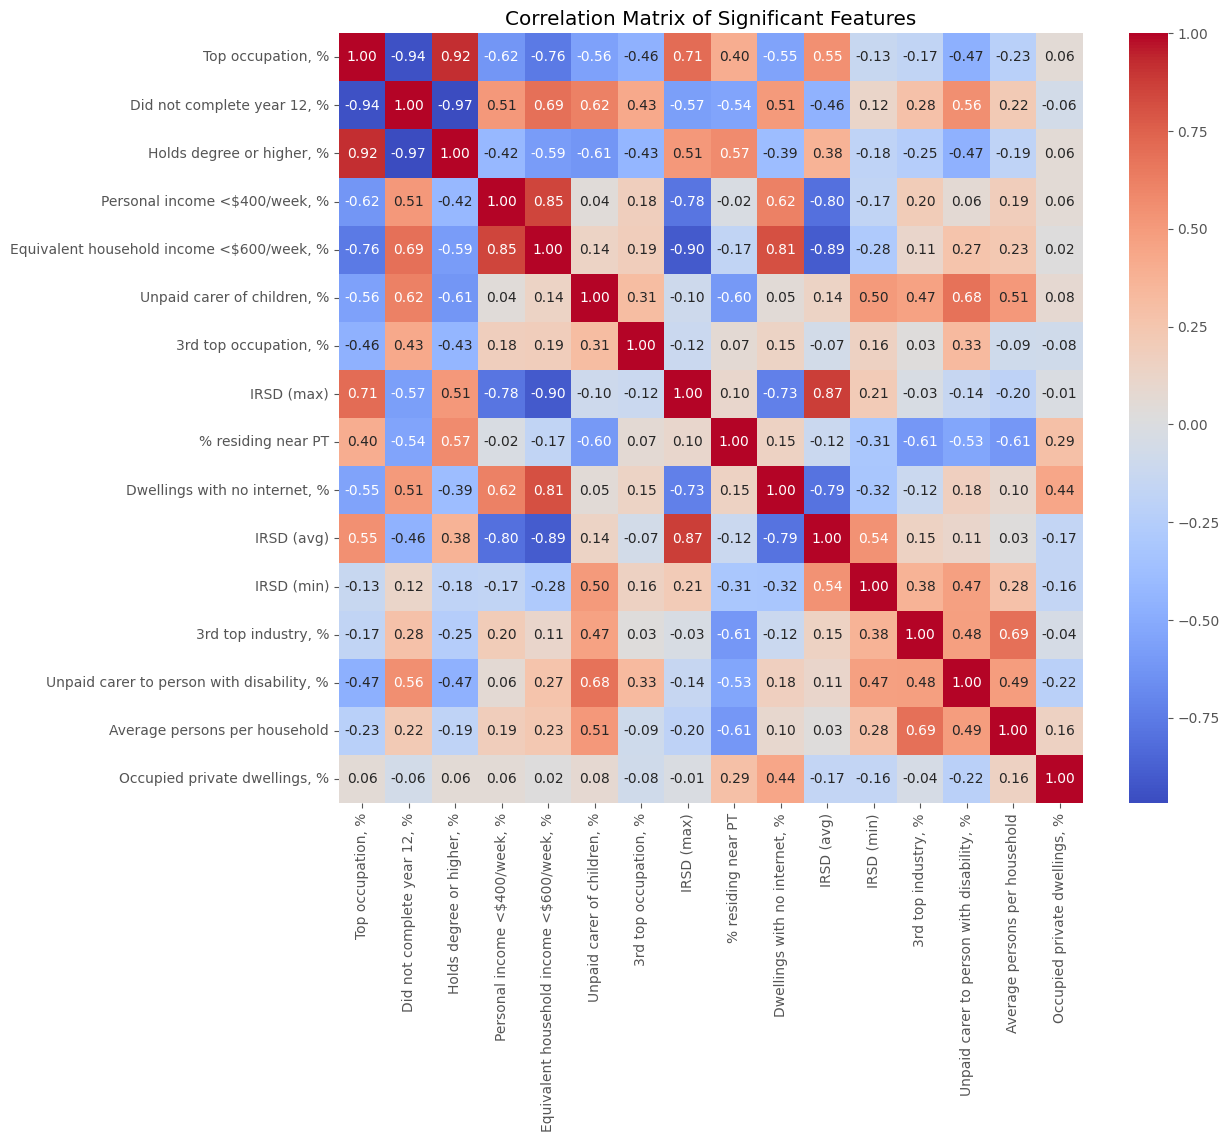

In [31]:
# do a corrplot of the significant features
# Create a DataFrame with the significant features
significant_feats = moran_df[moran_df['P-value'] < 0.05].index
significant_data = socio_data[significant_feats]

# Calculate the correlation matrix
corr = significant_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Significant Features')
plt.show()

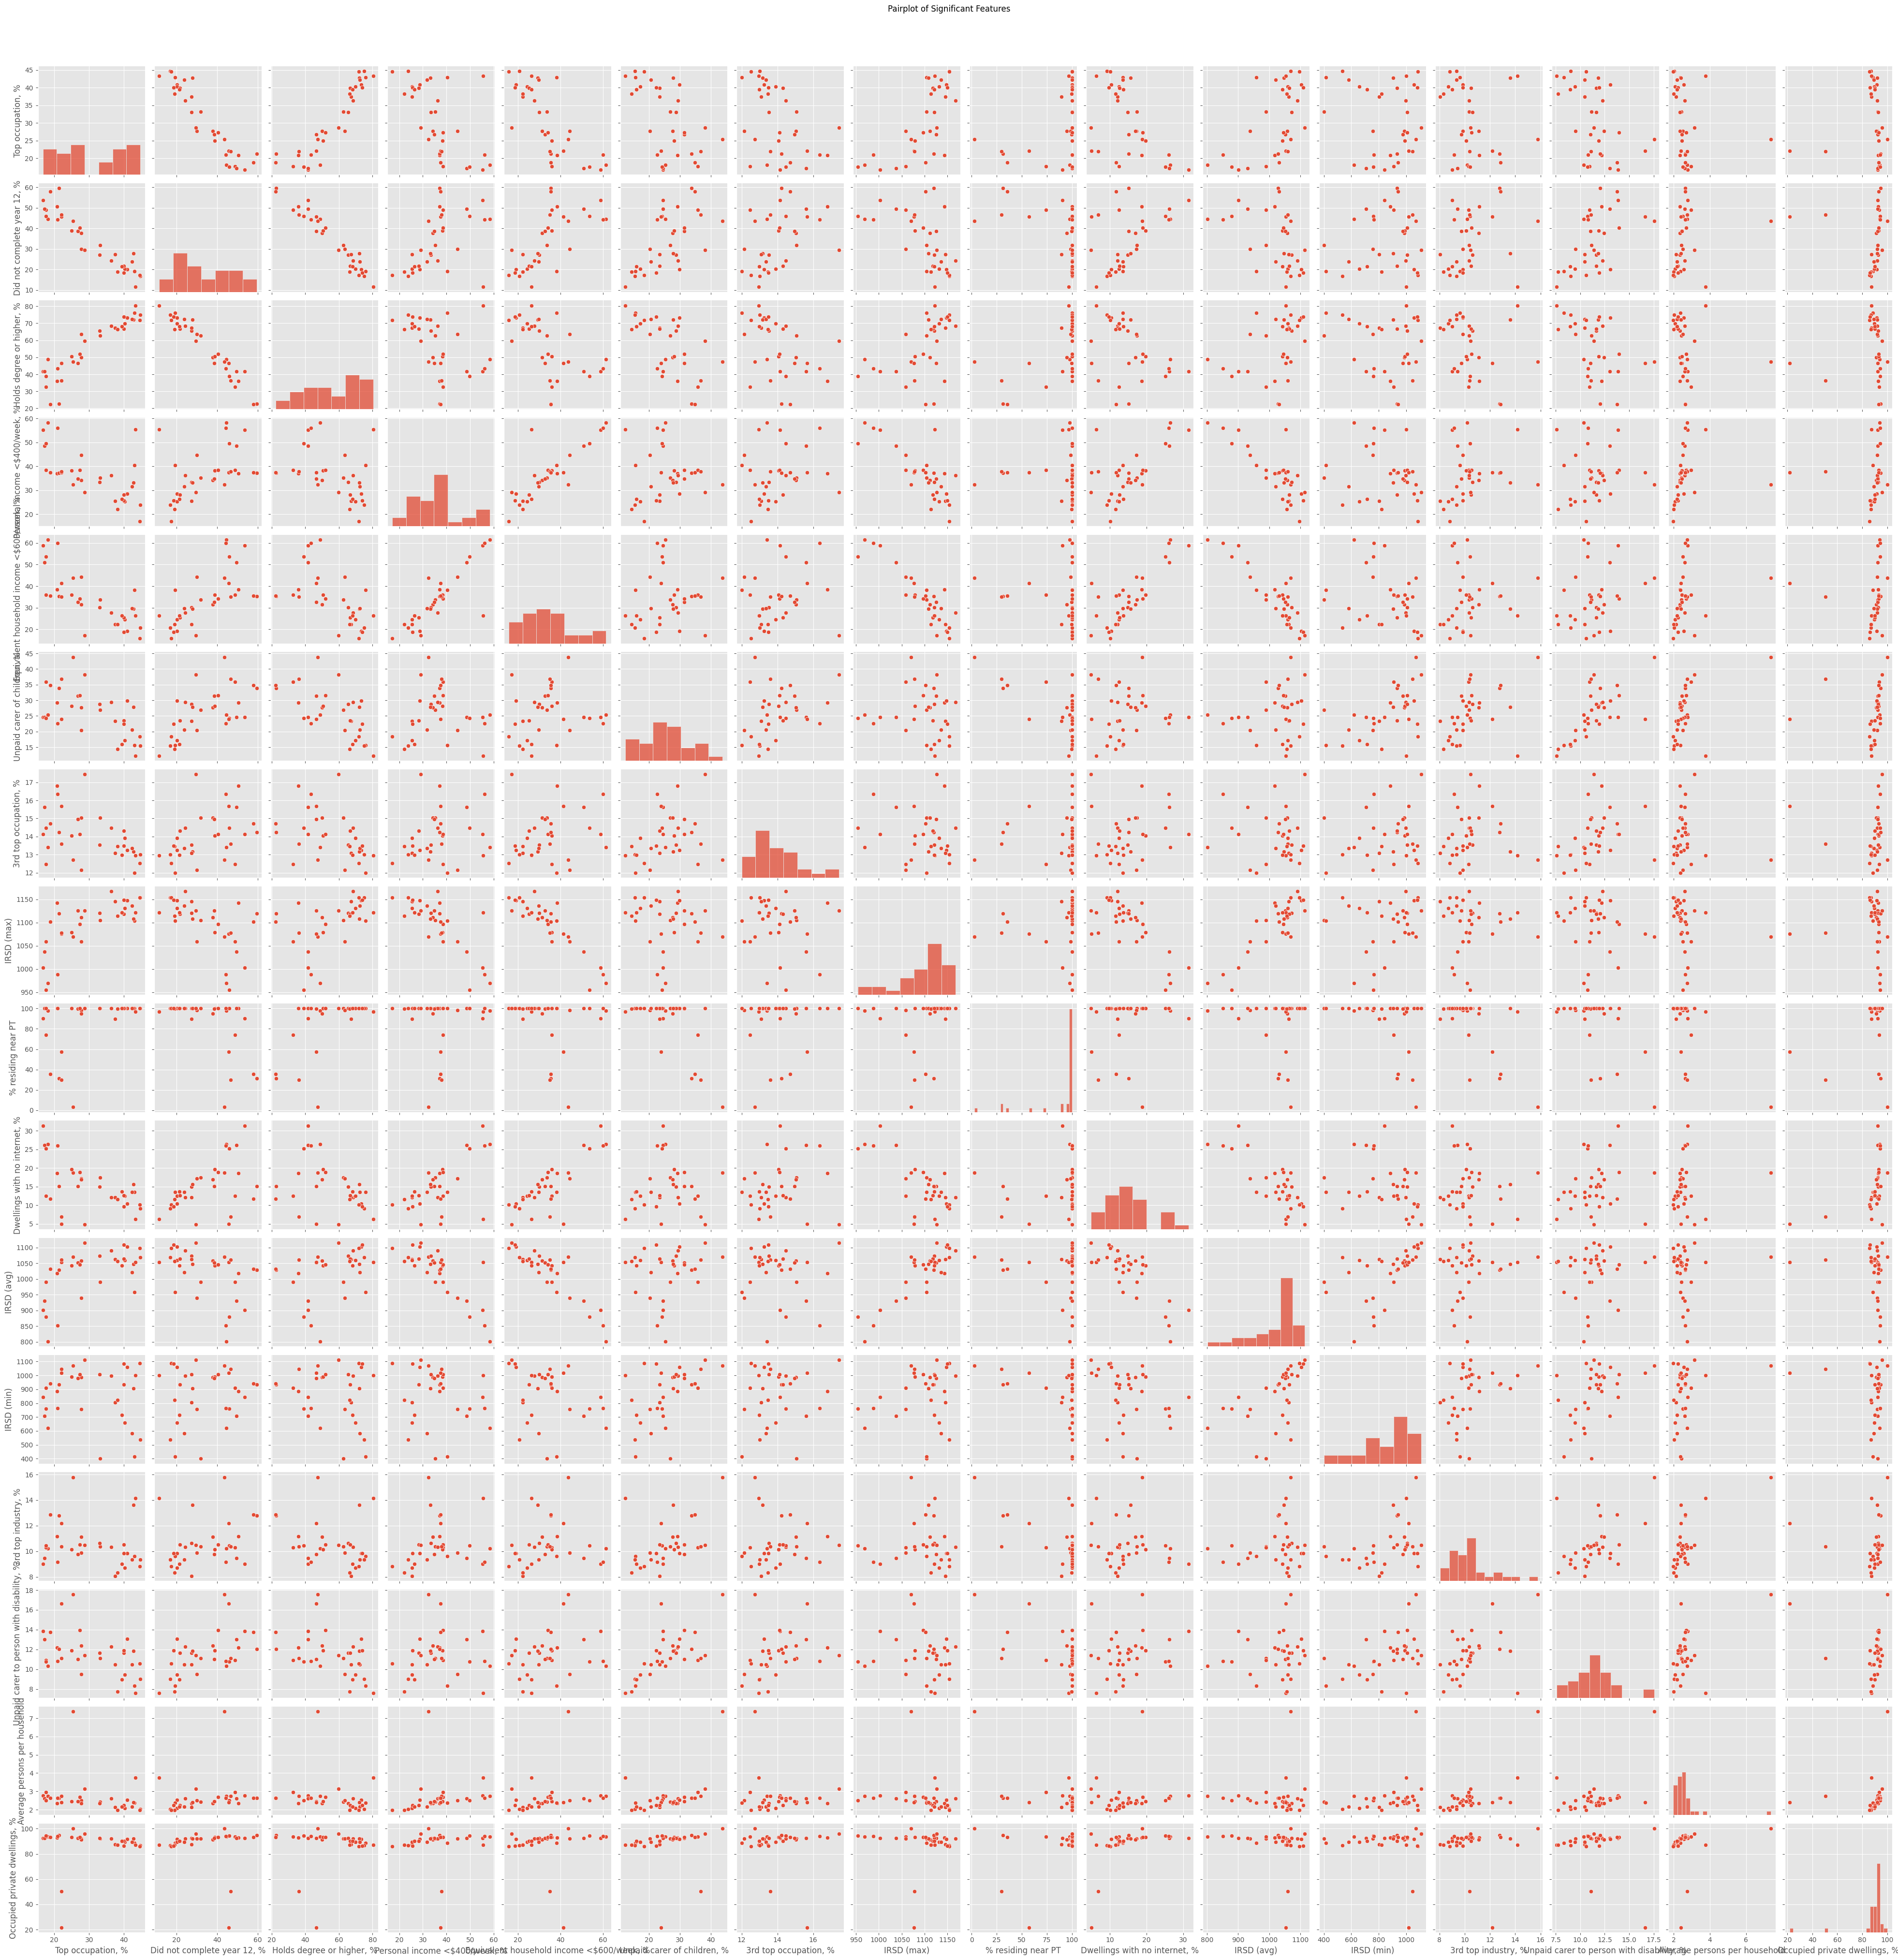

In [32]:
# do a pair plot of the significant features

sns.pairplot(significant_data)
plt.suptitle('Pairplot of Significant Features', y=1.02)
plt.show()


Highly correlated features (Pearson correlation > 0.7 or <-0.7):
[('Top occupation, %', 'Did not complete year 12, %'), ('Top occupation, %', 'Holds degree or higher, %'), ('Top occupation, %', 'Equivalent household income <$600/week, %'), ('Top occupation, %', 'IRSD (max)'), ('Did not complete year 12, %', 'Holds degree or higher, %'), ('Personal income <$400/week, %', 'Equivalent household income <$600/week, %'), ('Personal income <$400/week, %', 'IRSD (max)'), ('Personal income <$400/week, %', 'IRSD (avg)'), ('Equivalent household income <$600/week, %', 'IRSD (max)'), ('Equivalent household income <$600/week, %', 'Dwellings with no internet, %'), ('Equivalent household income <$600/week, %', 'IRSD (avg)'), ('IRSD (max)', 'Dwellings with no internet, %'), ('IRSD (max)', 'IRSD (avg)'), ('Dwellings with no internet, %', 'IRSD (avg)')]
Highly correlated features (Spearman correlation > 0.7 or <-0.7):
[('Top occupation, %', 'Did not complete year 12, %'), ('Top occupation, %', 'Holds deg

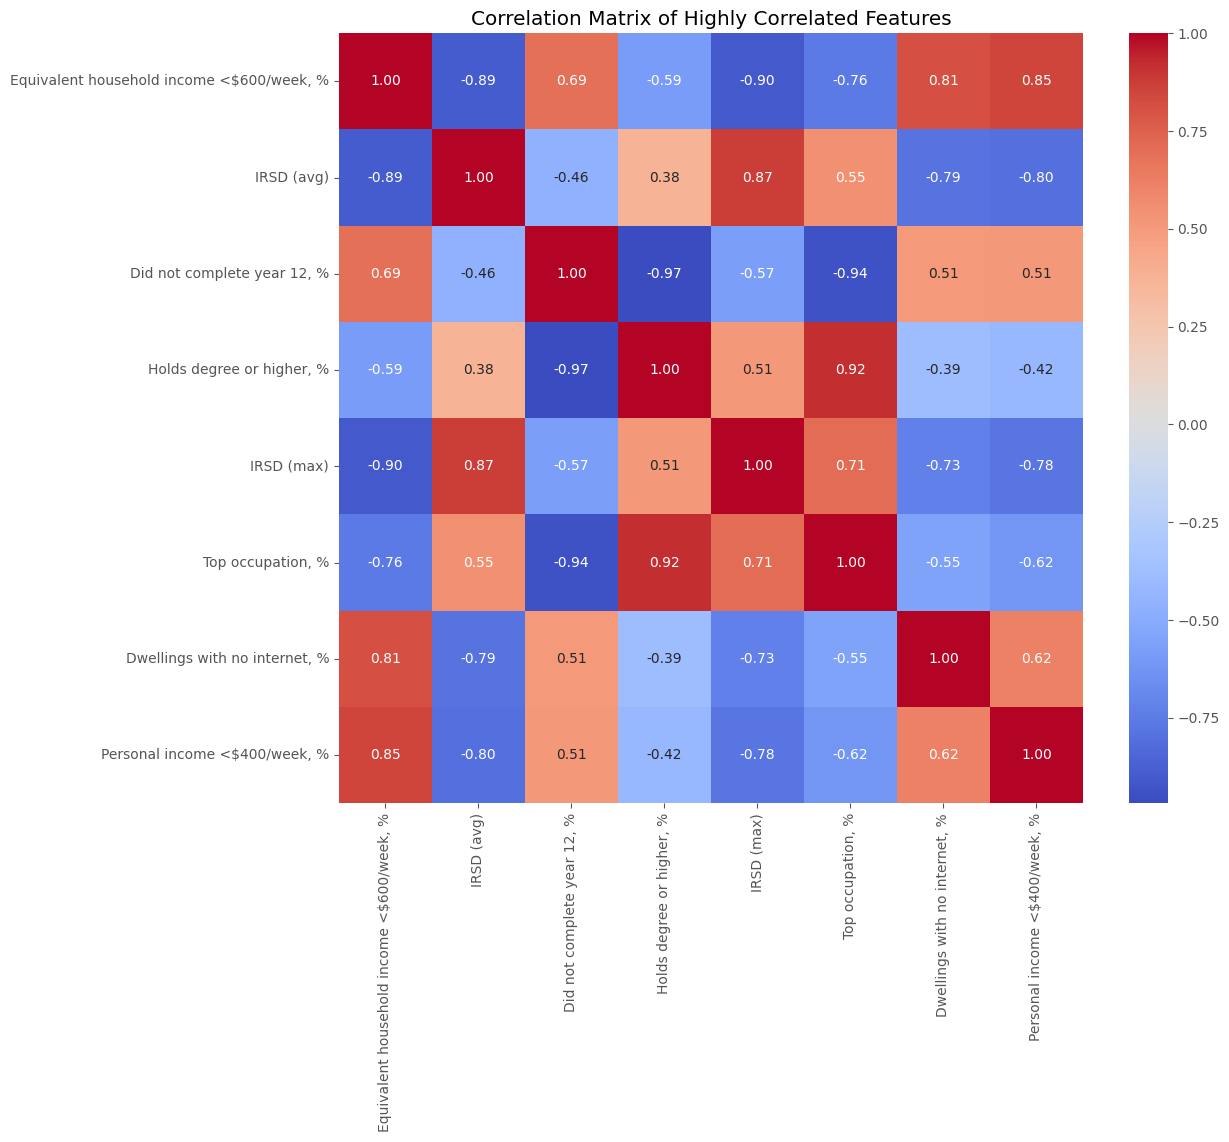

In [33]:
# print the features that are highly correlated (pearson correlation and spearman correlation > 0.7 or <-0.7)
# Calculate the correlation matrix
corr_pearson = significant_data.corr(method='pearson')
corr_spearman = significant_data.corr(method='spearman')

# Create a mask to display only the lower triangle of the matrix
mask = np.triu(np.ones_like(corr_pearson, dtype=bool))

# Find the highly correlated features
highly_correlated_pearson = (corr_pearson > 0.7) | (corr_pearson < -0.7)
highly_correlated_spearman = (corr_spearman > 0.7) | (corr_spearman < -0.7)

pairs_pearson = []
pairs_spearman = []

for i in range(len(highly_correlated_pearson.columns)):
	for j in range(i+1, len(highly_correlated_pearson.columns)):
		if highly_correlated_pearson.iloc[i, j]:
			pairs_pearson.append((highly_correlated_pearson.columns[i], highly_correlated_pearson.columns[j]))

for i in range(len(highly_correlated_spearman.columns)):
	for j in range(i+1, len(highly_correlated_spearman.columns)):
		if highly_correlated_spearman.iloc[i, j]:
			pairs_spearman.append((highly_correlated_spearman.columns[i], highly_correlated_spearman.columns[j]))


print('Highly correlated features (Pearson correlation > 0.7 or <-0.7):')
print(pairs_pearson)

print('Highly correlated features (Spearman correlation > 0.7 or <-0.7):')
print(pairs_spearman)

# print the length of the pairs
print('Number of highly correlated feature pairs (Pearson):', len(pairs_pearson))
print('Number of highly correlated feature pairs (Spearman):', len(pairs_spearman))


# take the intersection of the highly correlated features from pearson and spearman
# Find the intersection of highly correlated features
intersection = set(pairs_pearson).intersection(set(pairs_spearman))

print('Intersection of highly correlated features (Pearson and Spearman):')
print(intersection)

# print the length of the intersection
print('Number of highly correlated feature pairs (Intersection):', len(intersection))

# prepare a dataframe with the highly correlated features
# Create a DataFrame with the highly correlated features
highly_correlated_columns = list(set([pair[0] for pair in intersection]+[pair[1] for pair in intersection]))
highly_correlated_data = significant_data[highly_correlated_columns]

highly_correlated_data_corr = highly_correlated_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(highly_correlated_data_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Highly Correlated Features')
plt.show()

<Figure size 1500x1500 with 0 Axes>

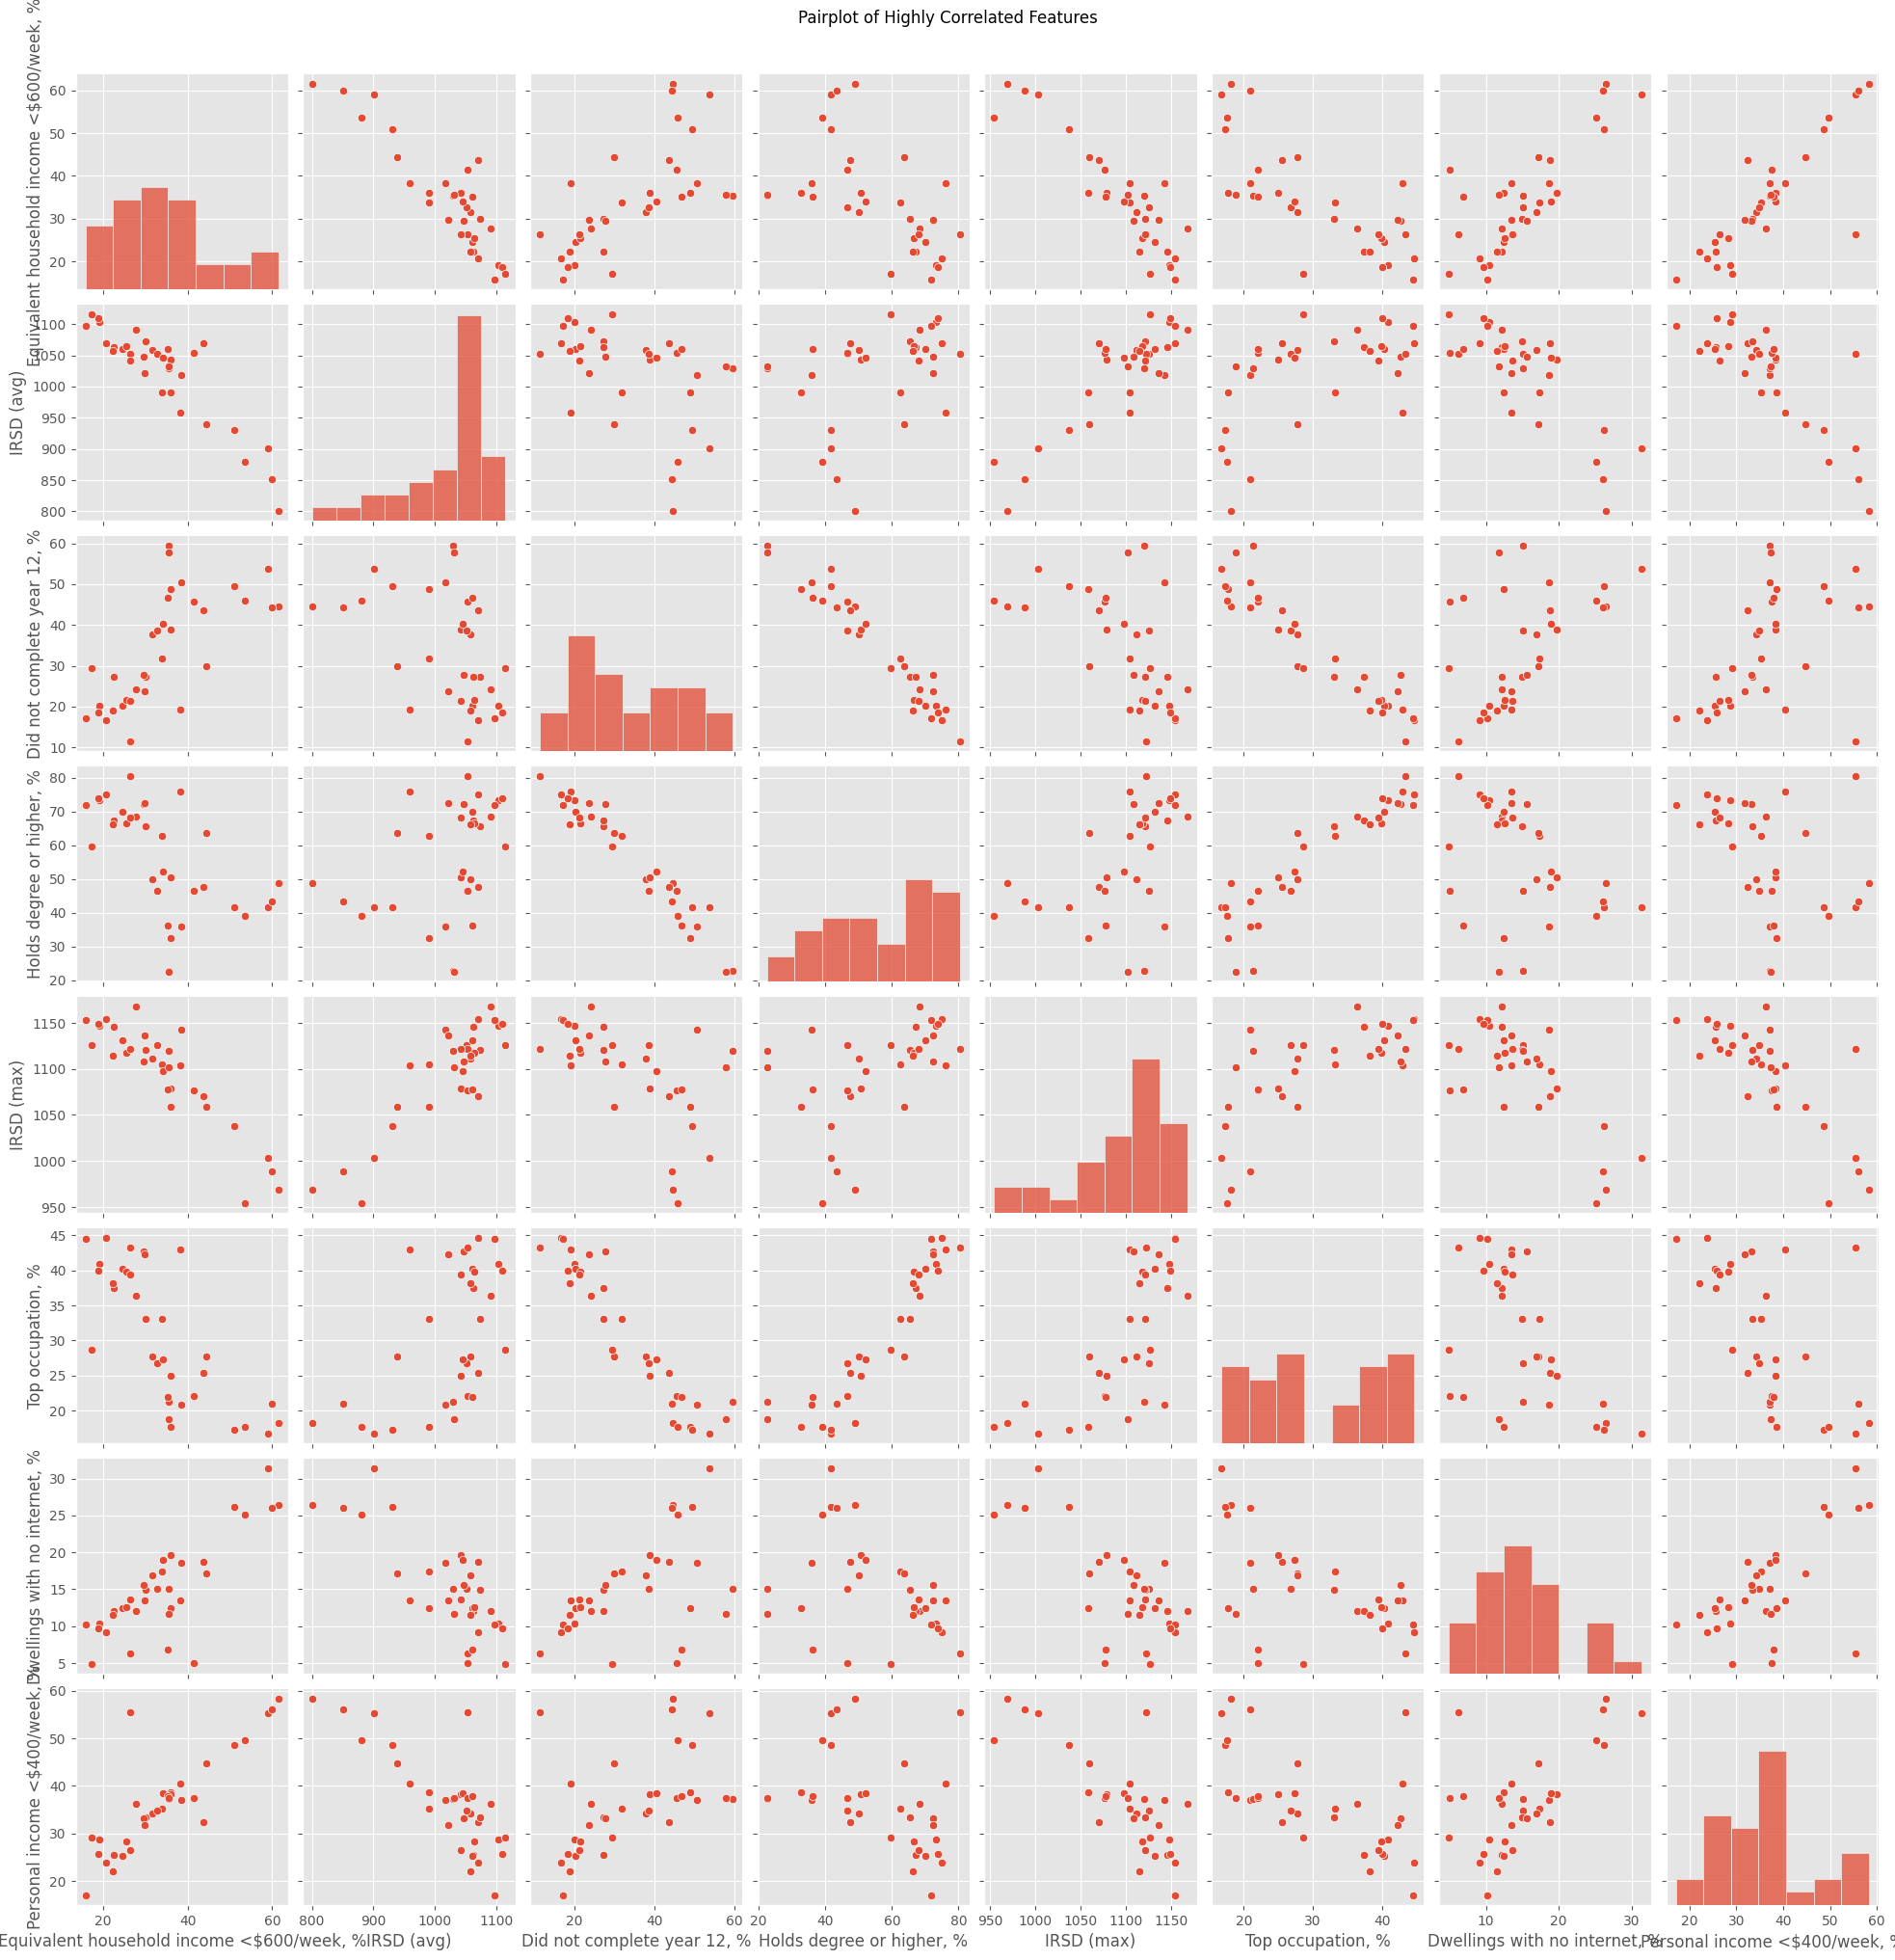

In [39]:
plt.figure(figsize=(15, 15))
# do an sns pairplot of the highly correlated features
sns.pairplot(highly_correlated_data)
plt.suptitle('Pairplot of Highly Correlated Features', y=1.02)
plt.show()

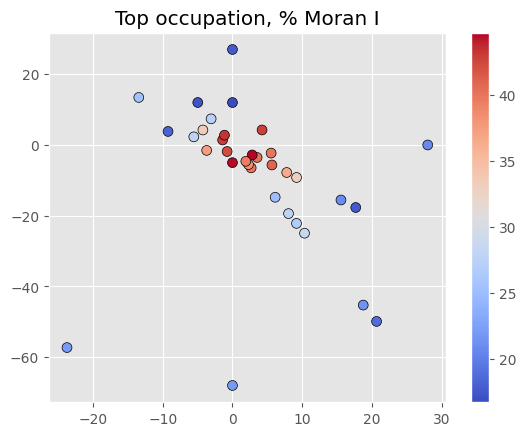

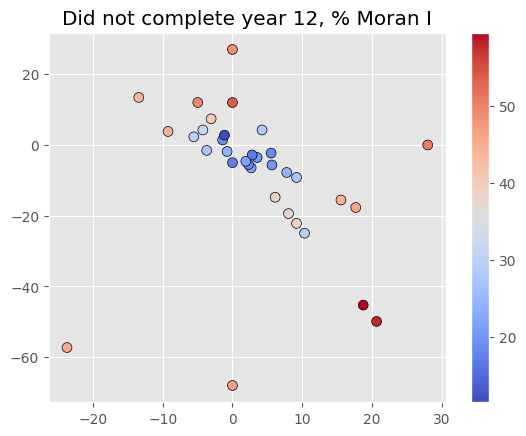

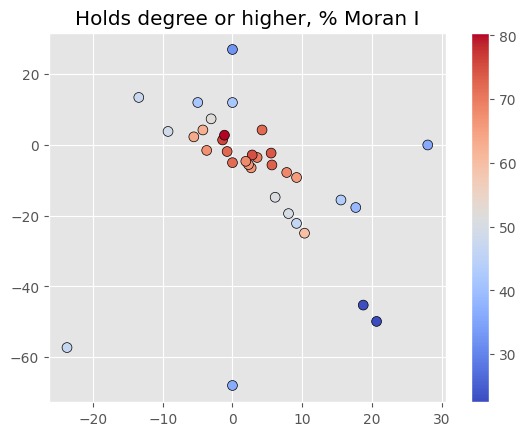

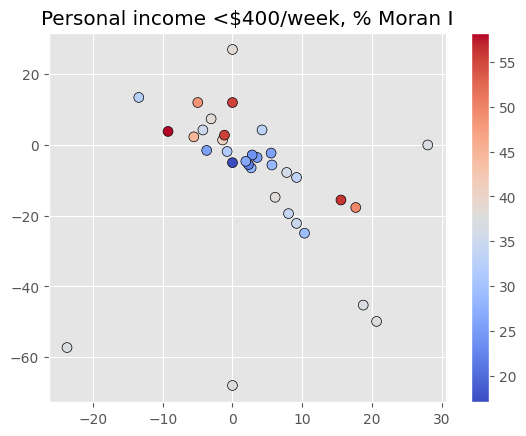

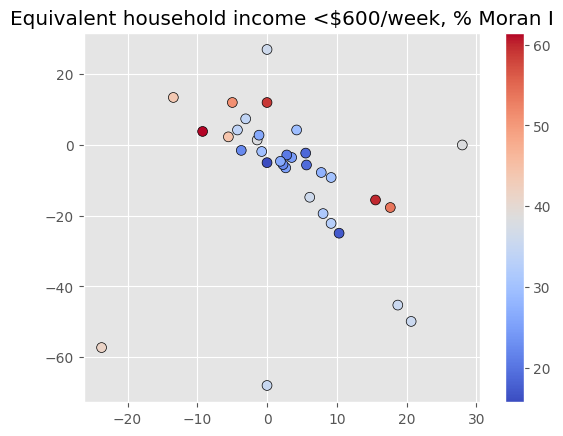

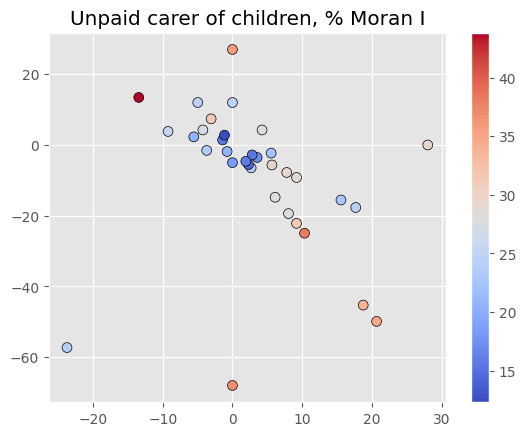

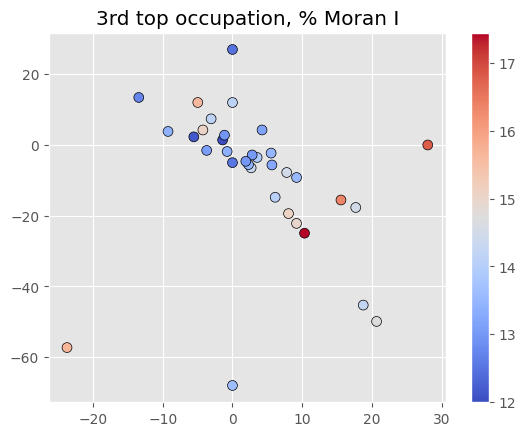

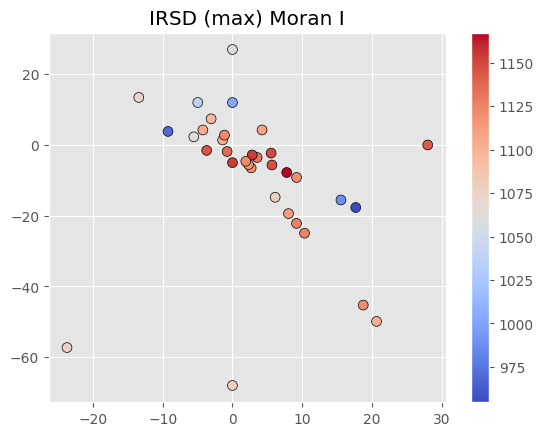

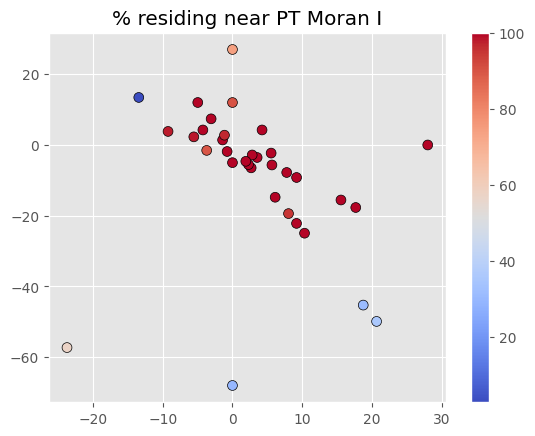

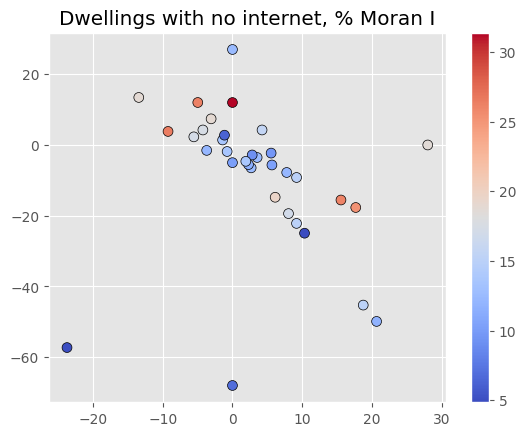

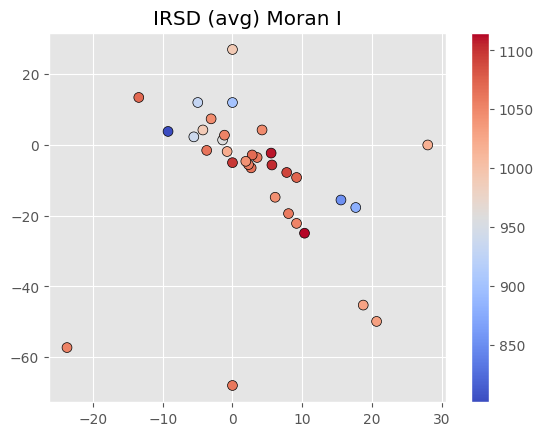

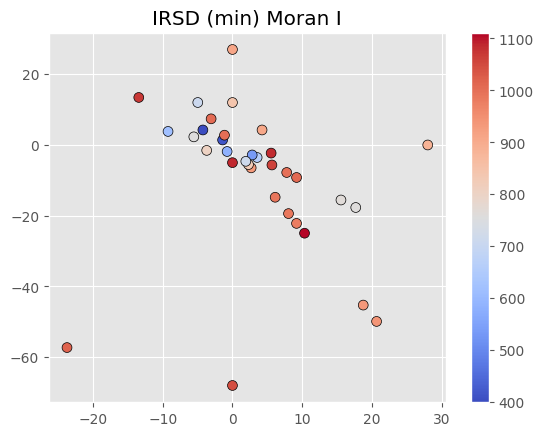

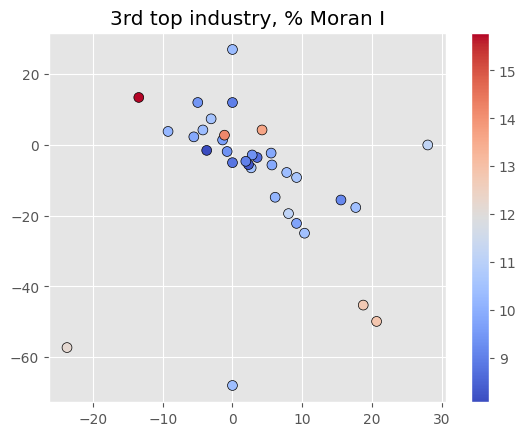

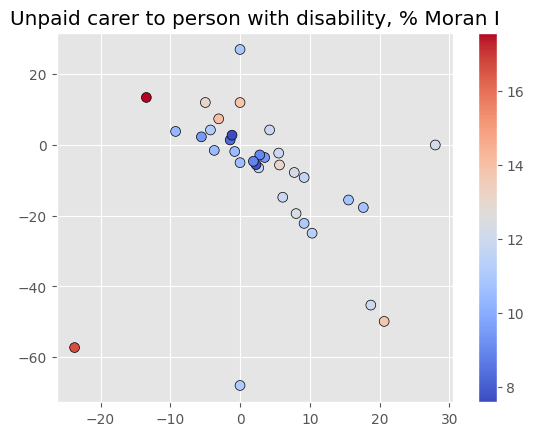

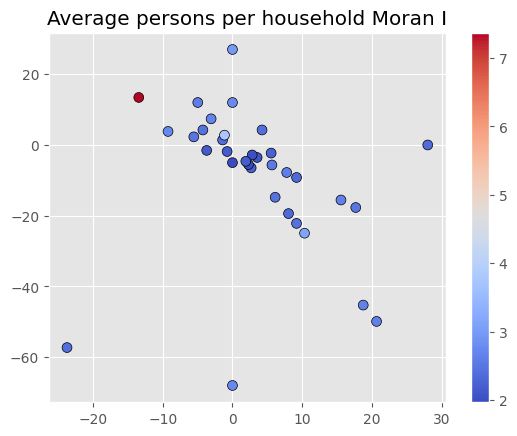

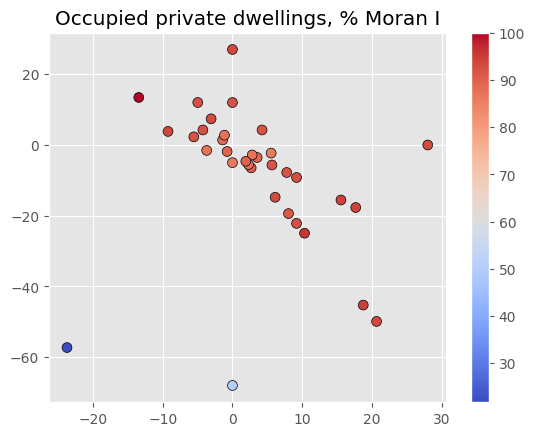

In [46]:
# do heatmap plot of all the significant moran's I features

for i in significant_feats:
    plt.scatter(data['cart_x'], data['cart_y'], c=socio_data[i], cmap='coolwarm', s=50, edgecolor='k', linewidth=0.5)
    plt.colorbar()
    plt.title(f'{i} Moran I')
    plt.show()

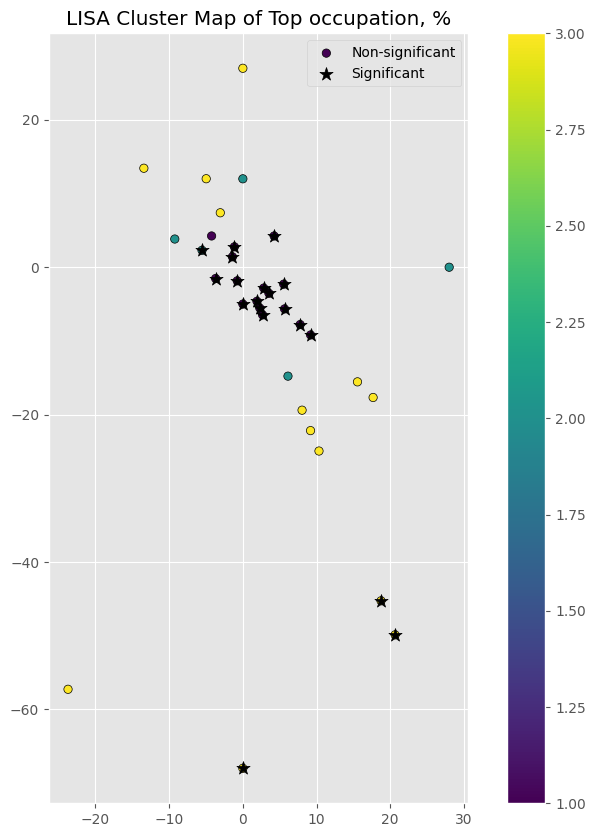

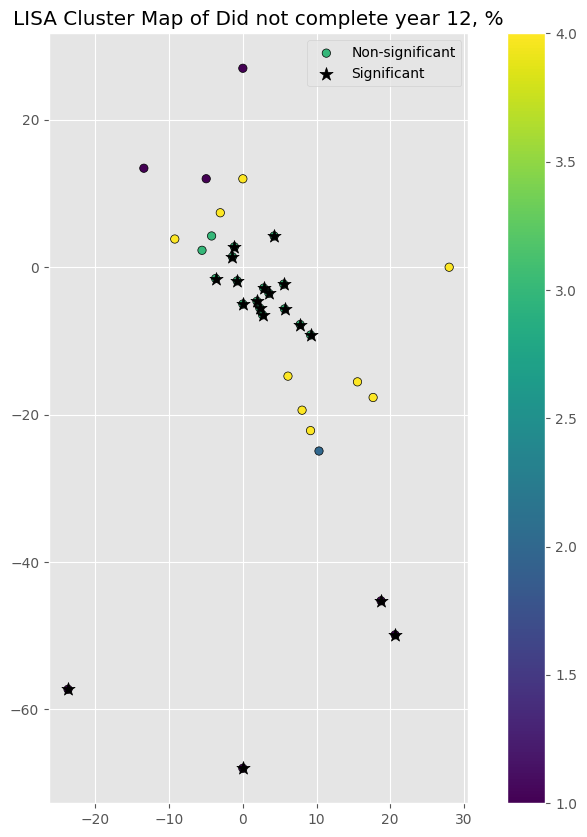

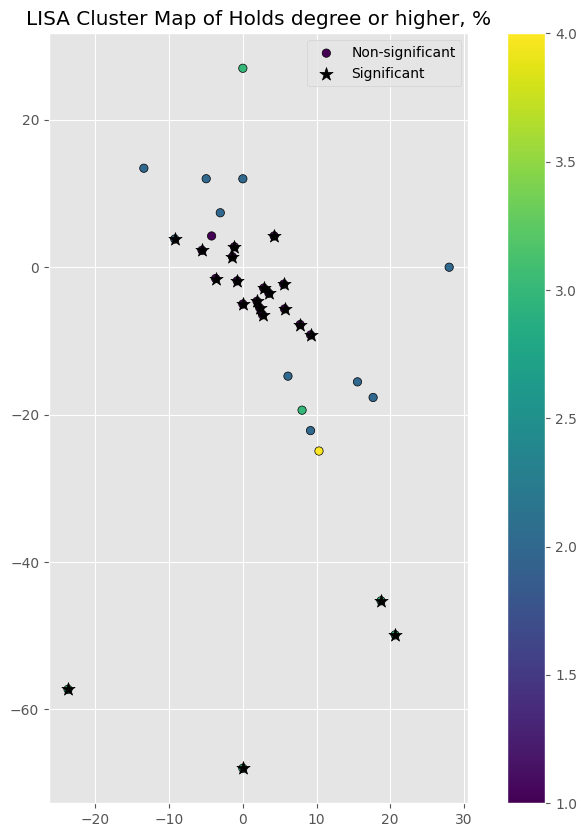

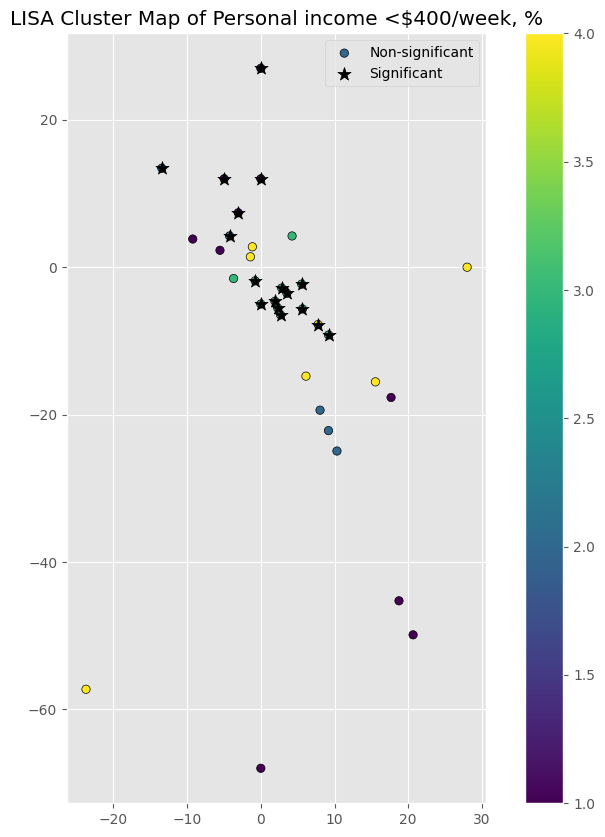

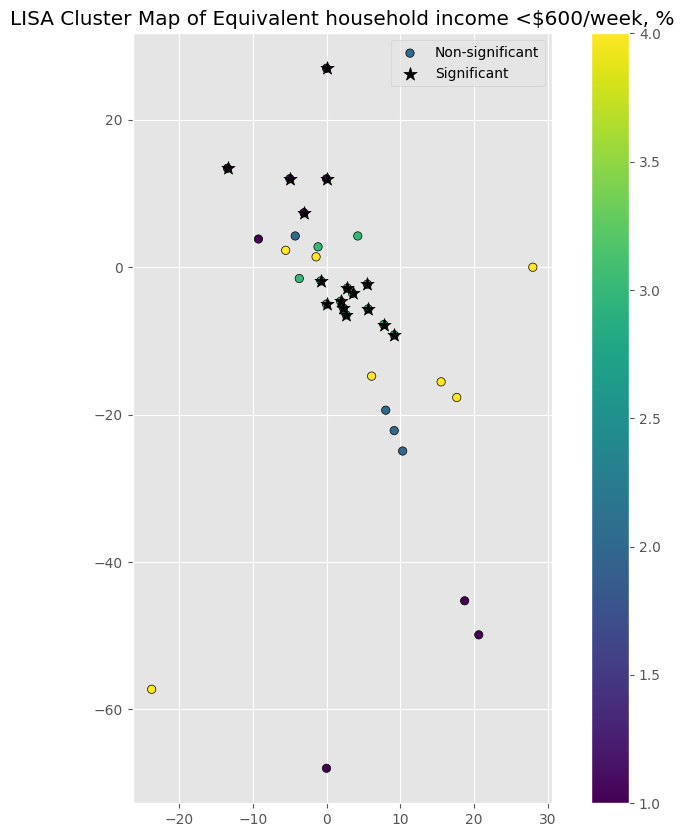

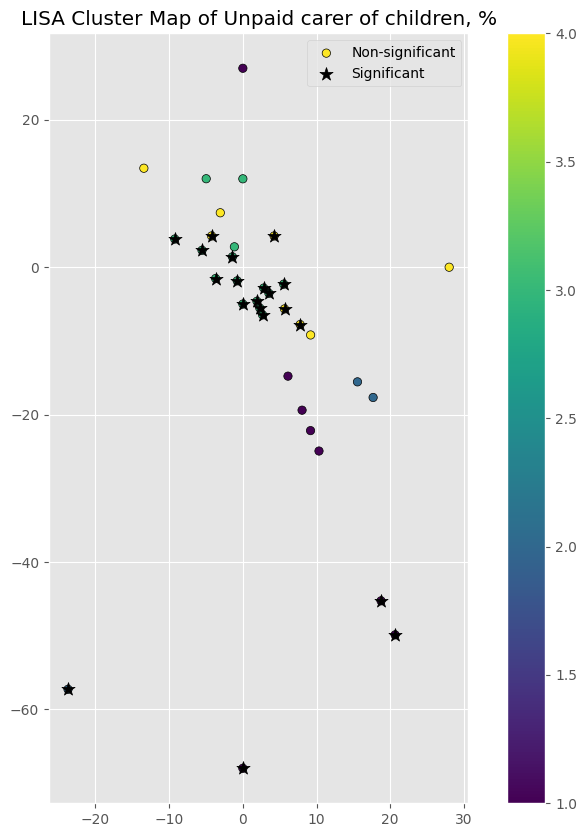

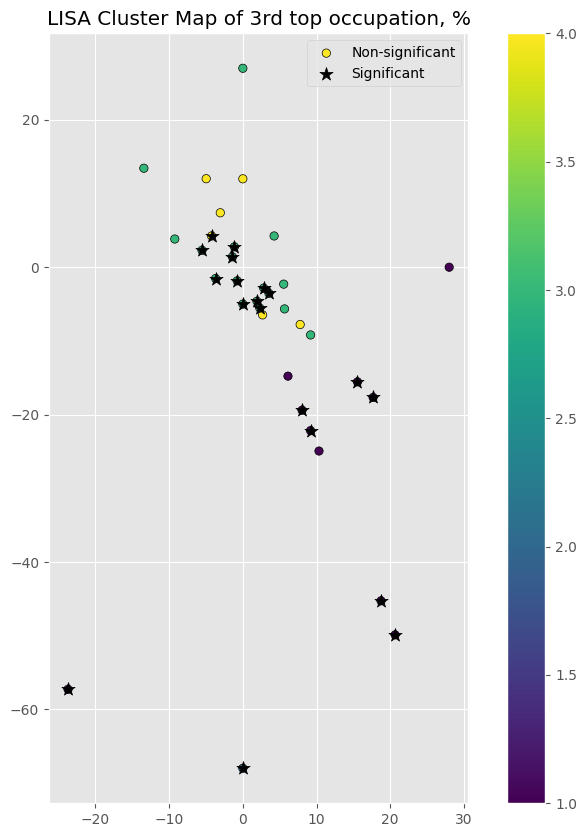

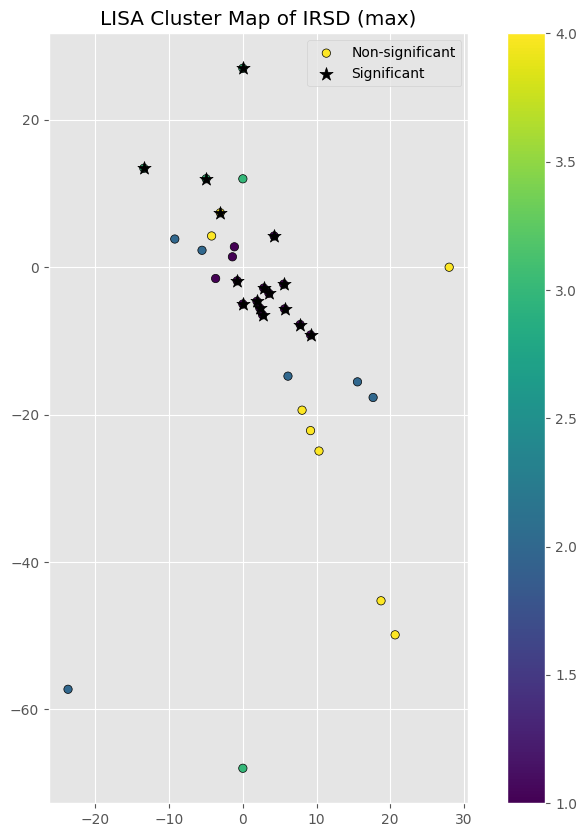

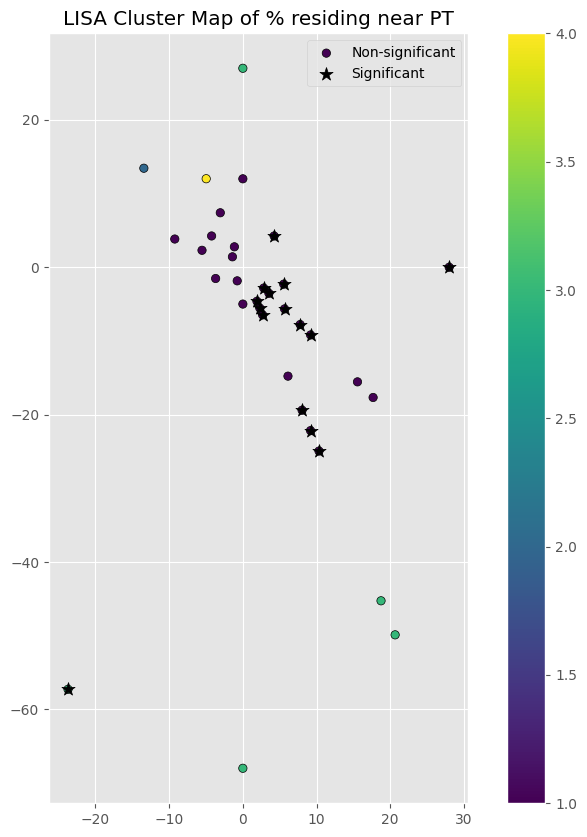

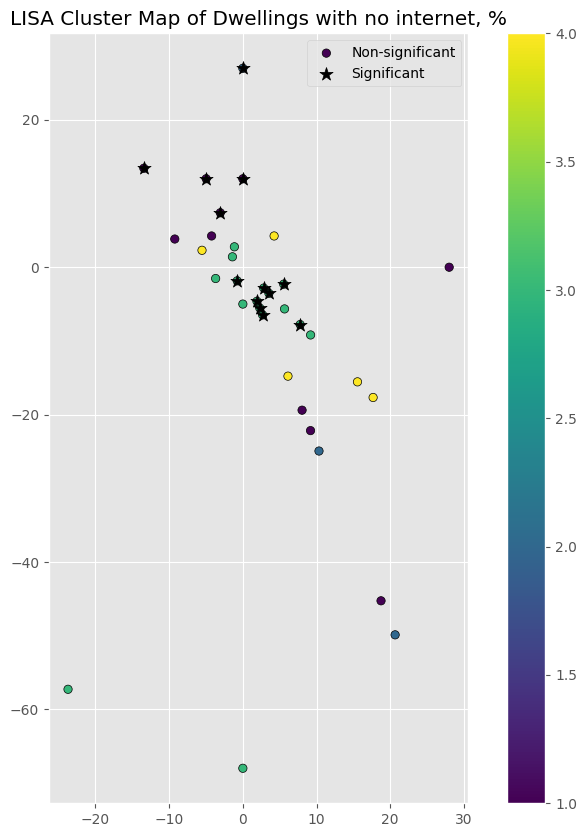

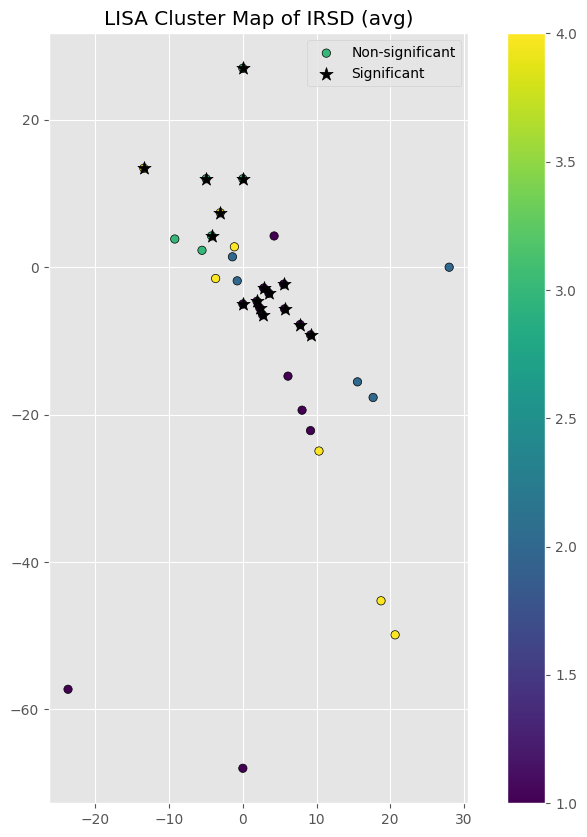

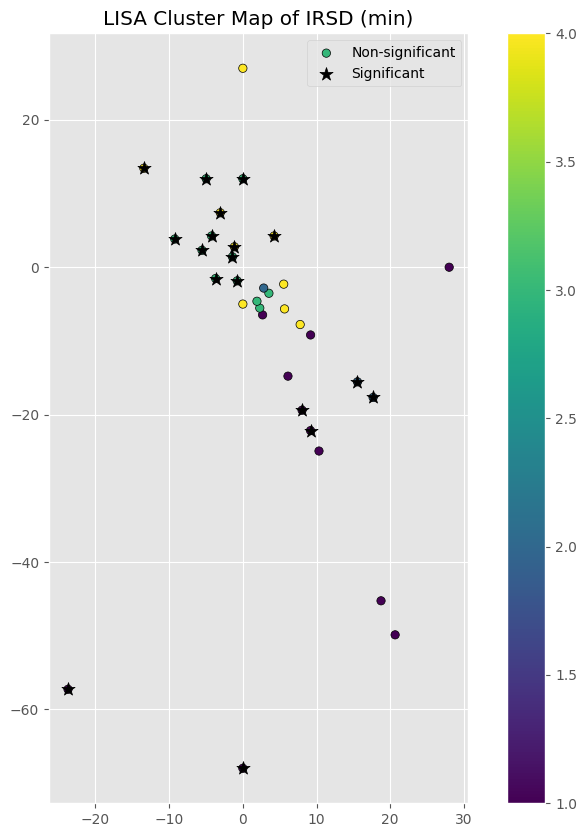

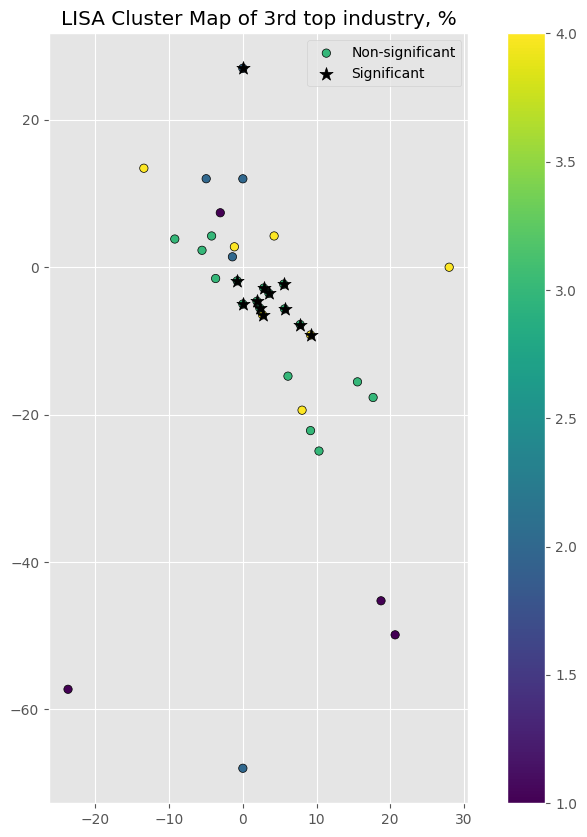

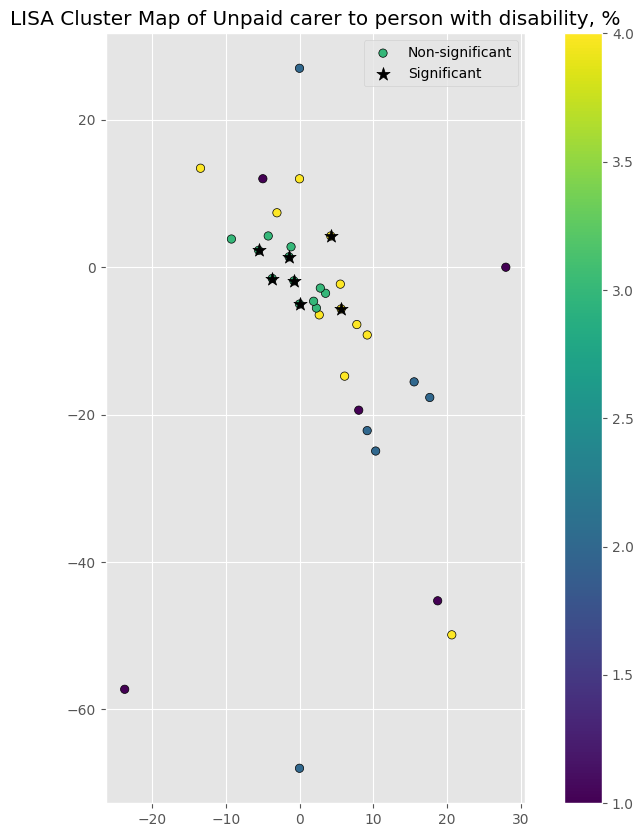

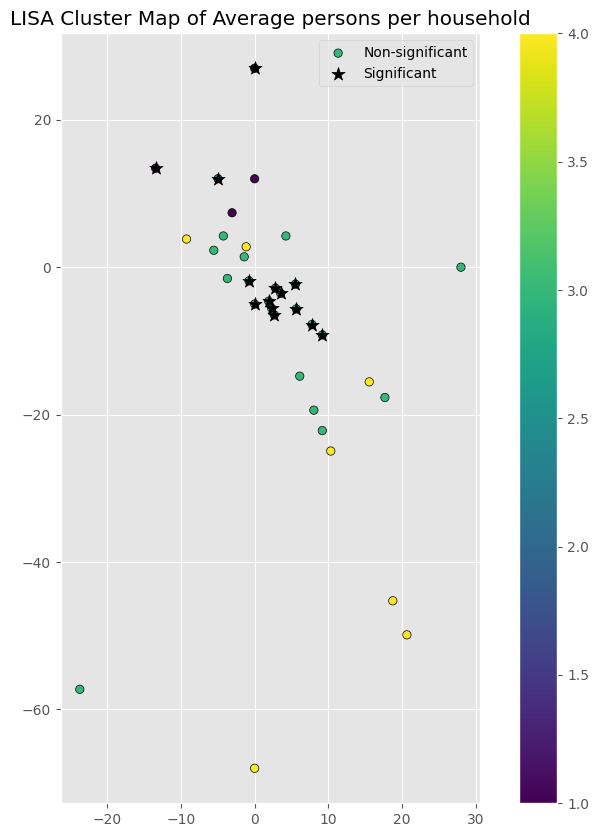

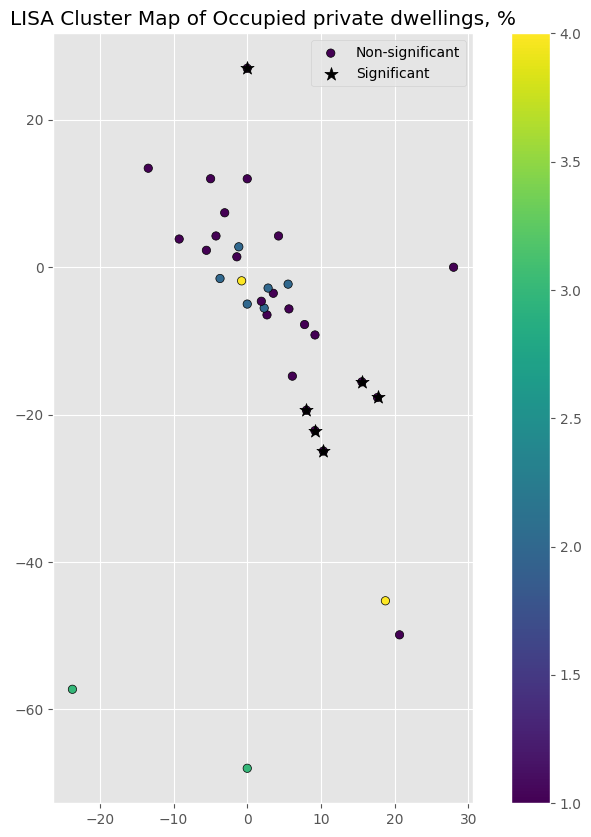

In [47]:
# do LISAs for all the significant features
# Create a dictionary to store the significant LISA clusters

for feat in significant_feats:
	lisa = Moran_Local(socio_data[feat], w)
	significant = lisa.p_sim < 0.05
	gdf.loc[significant, f'LISA Cluster {feat}'] = lisa.q[significant]

	# Plot significant clusters with colors for different cluster types
	fig, ax = plt.subplots(figsize=(10, 10))
	gdf.assign(cluster=lisa.q).plot(column='cluster', ax=ax, legend=True, cmap='viridis', edgecolor='black')
	gdf.loc[significant].plot(ax=ax, marker='*', color='black', markersize=100)
	plt.title(f"LISA Cluster Map of {feat}")
	plt.legend(['Non-significant', 'Significant'])
	plt.show()

	

In [53]:
# compute spatial-durbin for all pairs with good correlation
from pysal.model import spreg

pairwise_significant = []
for pair in intersection:
	print('Pair:', pair)
	y = significant_data[pair[0]]
	x = significant_data[pair[1]]
	model = spreg.ML_Lag(y.values[:, None], x.values[:, None], w=w, name_y=pair[0], name_x=[pair[1]], name_w='knn', name_ds='data', slx_lags=1)
	# if the p-value is less than 0.05, then the pair is significant
	print(model.summary)
	print('########################################\n**************************************')

print('Significant pairs based on spatial lag model:')

Pair: ('IRSD (max)', 'IRSD (avg)')
REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG WITH SLX - SPATIAL DURBIN MODEL (METHOD = FULL)
-------------------------------------------------------------------------------------------------
Data set            :        data
Weights matrix      :         knn
Dependent Variable  :  IRSD (max)                Number of Observations:          34
Mean dependent var  :   1096.9287                Number of Variables   :           4
S.D. dependent var  :     53.5358                Degrees of Freedom    :          30
Pseudo R-squared    :      0.7973
Spatial Pseudo R-squared:  0.7705
Log likelihood      :   -156.3924
Sigma-square ML     :    563.9233                Akaike info criterion :     320.785
S.E of regression   :     23.7471                Schwarz criterion     :     326.890

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Er

In [54]:
# non trivial feature pairs

non_trivial_pairs = {
    ('Top occupation, %', 'Holds degree or higher, %'),
    ('Top occupation, %', 'Did not complete year 12, %'),
    ('Equivalent household income <$600/week, %', 'IRSD (avg)'),
    ('Personal income <$400/week, %', 'IRSD (avg)'),
    ('Did not complete year 12, %', 'Holds degree or higher, %'),
    ('Equivalent household income <$600/week, %', 'Dwellings with no internet, %')
}

# compute spatial-durbin for all pairs with good correlation

pairwise_significant = []
for pair in non_trivial_pairs:
	print('Pair:', pair)
	y = significant_data[pair[0]]
	x = significant_data[pair[1]]
	model = spreg.ML_Lag(y.values[:, None], x.values[:, None], w=w, name_y=pair[0], name_x=[pair[1]], name_w='knn', name_ds='data', slx_lags=1)
	# if the p-value is less than 0.05, then the pair is significant
	print(model.summary)
	print('########################################\n**************************************')
	

Pair: ('Top occupation, %', 'Holds degree or higher, %')
REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG WITH SLX - SPATIAL DURBIN MODEL (METHOD = FULL)
-------------------------------------------------------------------------------------------------
Data set            :        data
Weights matrix      :         knn
Dependent Variable  :Top occupation, %                Number of Observations:          34
Mean dependent var  :     30.6237                Number of Variables   :           4
S.D. dependent var  :      9.7126                Degrees of Freedom    :          30
Pseudo R-squared    :      0.8785
Spatial Pseudo R-squared:  0.8483
Log likelihood      :    -90.1401
Sigma-square ML     :     11.1339                Akaike info criterion :     188.280
S.E of regression   :      3.3367                Schwarz criterion     :     194.386

------------------------------------------------------------------------------------
            Variable  